# 项目4 服装图像识别：Keras搭建与训练模型
###  项目描述
tf.keras是TensorFlow 2.0最主要的高阶API接口，为TensorFlow的代码提供了新的风格和设计模式，TensorFlow 2.0中默认推荐使用Keras API，大大简化了代码的简洁性和复用性，也间接地提供了TensorFlow开发的规范。Keras还兼具灵活性，很多部分可以定制，满足用户设计个性化的模型结构。

十几年来深度学习领域的研究员们把经典的 MNIST 数据集作为衡量算法的基准之一。有人调侃道：“如果一个算法在MNIST不work，那么它就根本没法用；而如果它在MNIST上work，它在其他数据上也可能不work”。FashionMNIST 是一个替代 MNIST 手写数字集的图像数据集。其涵盖了来自 10 种类别的共 7 万个不同商品的正面图片。Fashion-MNIST 的图片大小，训练、测试样本数及类别数与经典 MNIST 完全相同。本项目使用Keras API搭建神经网络，并训练、评估预测模型，完成服装图像识别。

### 思维导图
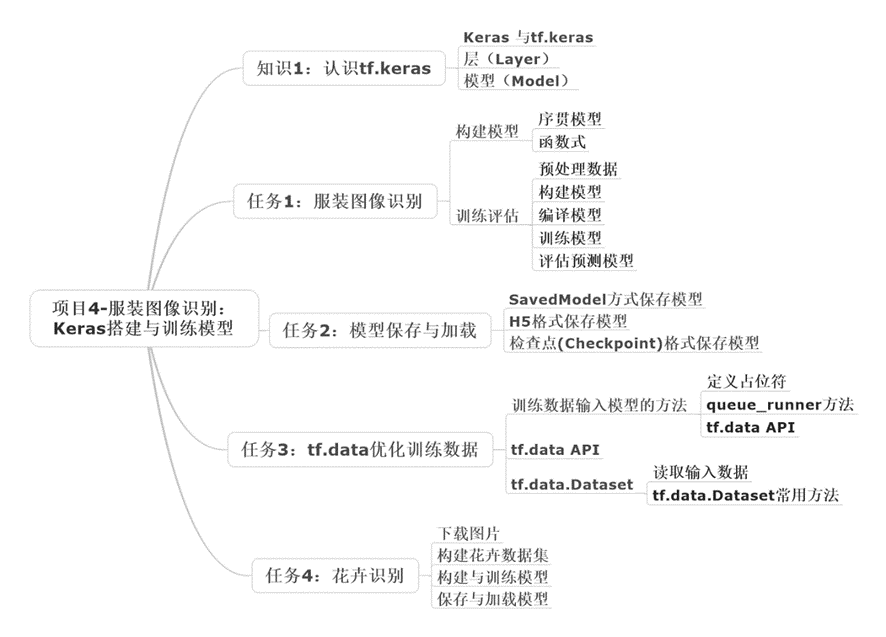


## 4.1	认识tf.keras

Keras 是一个主要由Python 语言开发的开源神经网络计算库，最初由François Chollet编写，它被设计为高度模块化和易扩展的高层神经网络接口，使得用户可以不需要过多的专业知识就可以简洁、快速地完成模型的搭建与训练。Francois 于 2015 年 3 月将 Keras 的第一个版本发布到GitHub。
### 4.1.1 Keras 与tf.keras

那么 Keras 与tf.keras 有什么区别与联系呢？其实Keras 可以理解为一套搭建与训练神经网络的高层API 协议，Keras 本身已经实现了此协议，可以方便的调用TensorFlow，CNTK 等后端完成加速计算。
TensorFlow 与Keras 存在既竞争，又合作的关系，甚至连Keras 创始人François Chollet是Google AI的 开发人员。早在2015 年11 月，TensorFlow 被加入Keras 后端支持。从2017 年开始，Keras 的大部分组件被整合到TensorFlow 框架中。在TensorFlow 2 版本中，Keras 被正式确定为TensorFlow 的高层API 唯一接口，Keras 被实现在tf.keras 子模块中，取代了TensorFlow 1 版本中自带的tf.layers 等高层接口。tf.keras 是用于构建和训练深度学习模型的 TensorFlow 高阶 API。利用此 API，可实现快速原型设计、先进的研究和生产。
在TensorFlow 中，也实现了一套Keras 协议，即tf.keras，但只能基于TensorFlow 后端计算，并对TensorFlow 的支持更好。对于使用TensorFlow 的开发者来说，tf.keras 可以理解为一个普通的子模块，与其他子模块，如tf.math，tf.data 等并没有什么差别。
tf.keras具有以下三大优势：
- 方便用户使用，Keras 具有针对常见用例做出优化的简单而一致的界面。它可针对用户错误提供切实可行的清晰反馈。
- 模块化和可组合，将可配置的构造块组合在一起就可以构建 Keras 模型，并且几乎不受限制。
- 易于扩展，可以编写自定义构造块，表达新的研究创意；并且可以创建新层、指标、损失函数并开发先进的模型。


tf.keras有以下接口模块。

* activations： tf.keras.actibations中包含了当前主流的激活函数，可以直接通过该API进行激活函数的调用。
* applications： tf.keras.applications中包含的是已经进行预训练的神经网络模型，可以直接进行预测或者迁移学习。目前该模块中包含了主流的神经网络结构。
* backend： tf.keras.backend中包含了Keras后台的一些基础API接口，用于实现高阶API或者自己构建神经网络。
* datasets： tf.keras.datasets中包含了常用的公开数据训练集，可以直接进行使用（需要翻墙），数据集有CIFAR-100、Boston Housing等。
* layers： tf.keras.layers中包含了已经定义好的常用的神经网络层。
* losses： tf.keras.losses中包含了常用的损失函数，可以根据实际需求直接进行调用。
* optimizers： tf.keras.optimizers中包含了主流的优化器，可以直接调用API使用。比如Adm等优化器可以直接调用，然后配置所需要的参数即可。
* preprocessing： tf.keras.preprocessing中包含了数据处理的一些方法，分为图片数据处理、语言序列处理、文本数据处理等，比如NLP常用的pad_sequences等，在神经网络模型训练前的数据处理上提供了非常强大的功能。
* regularizers： tf.keras.regularizers中提供了常用的正则化方法，包括L1、L2等正则化方法。
* wrappers ：tf.keras.wrappers是一个Keras模型的包装器，当需要进行跨框架迁移时，可以使用该API接口提供与其他框架的兼容性。
* Sequential类： tf.keras.Sequential可以让我们将神经网络层进行线性组合形成神经网络结构。

### 4.1.2 层（Layer）
Keras 有两个重要的概念：模型（Model）和层（Layer）。层将各种计算流程和变量进行了封装（例如全连接层，卷积层、池化层等），而模型则将各种层进行组织和连接，并封装成一个整体，描述了如何将输入数据通过各种层以及运算而得到输出。在需要模型调用的时候，使用 y_pred = model(X) 的形式即可。Keras 在 tf.keras.layers 下内置了深度学习中大量常用的的预定义层，同时也允许用户自定义层。
可在官网文档Module: tf.keras.layers中看到预先存在的层的完整列表，它包括Dense，Conv2D，LSTM，BatchNormalization，Dropout等。

实现自定义层推荐的方法是扩展tf.keras.Layer 类并实现：
- __init__ ，执行所有与输入无关的初始化
- build，输入张量的形状，并可以执行其余的初始化
- call，进行正向计算。

可以使用tf.Variable() 或者add_weight() 方法为层添加权重。


可以在 __init__中创建变量，也可以调用 build 来创建变量。在 build 中创建变量的好处是，它支持根据将要操作的层的输入形状，创建后期变量。
另一方面，在 __init__ 中创建变量意味着需要明确指定创建变量所需的形状。build方法只会被调用一次，经常被用来创建变量。如果build创建变量（权重）后，输入参数和权重的形状不匹配，则会报错。
上一章中全连接层 y=wx+b ，可以通过以下方式实现，即实现了密集连接的层（Dense）。它具有一个状态：变量 w 和 b。


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        self.w = self.add_weight(
            shape=(input_dim, units), initializer="random_normal", trainable=True
        )
        self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)
print(y)


In [ ]:
linear_layer.get_weights()

或者通过trainable_weights打印可训练权重，non_trainable_weights打印不可训练权重。

In [ ]:
print("weights:", len(linear_layer.weights))
print("trainable weights:", linear_layer.trainable_weights)

上面例子中 Linear 层接受了一个 input_dim 参数，用于计算 __init__() 中权重 w 和 b 的形状。在许多情况下不知道输入形状的大小，并希望在对层进行实例化后的某个时间再创建权重。建议在层的 build(self, inputs_shape) 方法中创建层的权重。

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


### 	4.1.3 模型（Model）
通常使用 Layer 类来定义内部计算块，使用 Model 类来定义模型。Layer类定义了网络层的一些常见功能，如添加权值，管理权值列表等，例如全连接层（Dense），卷积层（Conv2D），循环层（RNN），或者ResNet 块、Inception 块。Model 类除了具有Layer 类的功能，还添加了保存、加载模型，训练与测试模型等便捷功能。Model 类对应于我们常说的深度学习模型或深度神经网络，类如全连接神经网络，卷积神经网络，循环神经网络等。
通过对 tf.keras.Model进行子类化，并定义向传播来构建完全可自定义的模型。在__init__ 方法中创建层，将它们设置为类实例的属性，在 call方法中定义前向传播。
在继承类中，需要重写 __init__() （构造函数，初始化）和 call(input) （模型调用）两个方法，同时也可以根据需要增加自定义的方法。


以下实例上一章介绍的全连接神经网络，建立一个继承了 tf.keras.Model 的模型类 MyModel。这个类在__init__ 方法中创建了两个全连接层（ tf.keras.layers.Dense ），在 call方法中定义前向传播。

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self, num_classes=10):
    super(MyModel, self).__init__(name='my_model')
    self.num_classes = num_classes
    # 在此处定义层。.
    self.dense_1 = tf.keras.layers.Dense(32, activation='relu')
    self.dense_2 = tf.keras.layers.Dense(num_classes, activation='sigmoid')

  def call(self, inputs):
    # 在这里定义你的前向传播
    # 使用之前定义的层（在`__init__`中）
    x = self.dense_1(inputs)
    output = self.dense_2(x)
    return output


In [ ]:
# 随机产生训练数据
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

model = MyModel(num_classes=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 训练5个周期
model.fit(data, labels, batch_size=32, epochs=5)


tf.keras.layers.Dense
(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)


其包含的主要参数如下：

- units：输出张量的维度；
- activation：激活函数。常用的激活函数包括 tf.nn.relu 、 tf.nn.tanh 和 tf.nn.sigmoid；
- use_bias：是否加入偏置向量 bias。默认为 True；
- kernel_initializer 、 bias_initializer：权重矩阵 kernel 和偏置向量 bias 两个变量的初始化器。默认为 tf.glorot_uniform_initializer 1 。设置为 tf.zeros_initializer 表示将两个变量均初始化为全 0；

该层包含权重矩阵 w = [input_dim, units] 和偏置向量 b = [units] 两个可训练变量。


## 4.2	任务1：服装图像识别
MNIST数据集作为机器学习的经典基准测试，在深度学习时代显得过于简单了，Fashion MNIST是一个替代 MNIST 手写数字集的图像数据集。该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，Fashion MNIST 的大小、格式和训练集/测试集划分与原始的 MNIST 完全一致，使用 60,000 个图像来训练网络，使用 10,000 个图像来评估网络学习对图像分类的准确率。
使用tf.keras提供的高层API，可以轻松得完成建模三部曲——模型构建、训练、评估等工作。下面将以Fashion MNIST数据集为例分别来介绍如何使用tf.keras完成这三部曲。


### 	4.2.1构建模型
在TensorFlow 2.x 版本中，可以使用三种方式来构建 Keras 模型，分别是序贯模型（Sequential API）， 函数式 (Functional API) 以及自定义模型 (Model Subclassing)。
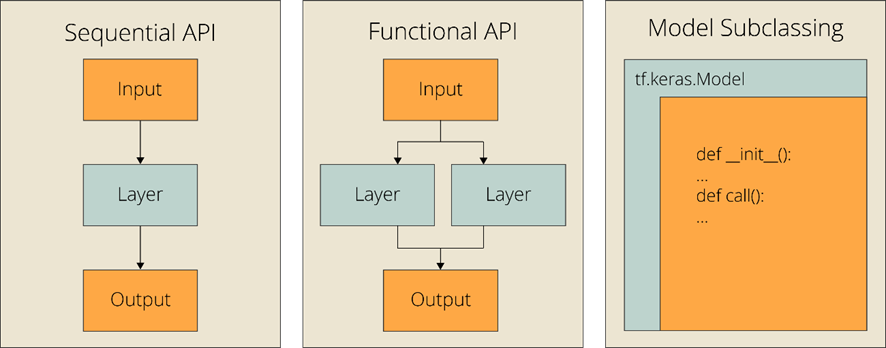

### 1、	序贯模型（Sequential API）
序贯模型是多个网络层的线性堆叠，其中每个层恰好都是一个输入张量和一个输出张量。也就是“一条路走到黑”。
通常是将多个层 (layer) 组装起来形成一个模型 (model)，最常见的一种方式就是层的堆叠，层可以是上一章介绍的全连接层，或者是下一章将会介绍的卷积网络。
例如下面代码定义了一个包含三个全连接层的神经网络模型。


In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)


通过以下add()方法以增量方式创建 Sequential 模型。代码如下所示：

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

模型需要知道输入数据的shape，因此，Sequential的第一层需要接受一个关于输入数据shape的参数，后面的各个层则可以自动的推导出中间数据的shape，因此不需要为每个层都指定这个参数。可以用keras.Input向模型中输入数据，并指定数据的形状、数据类型等信息。

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))
model.summary()


或者传递一个input_shape的关键字参数给第一层，input_shape是一个tuple类型的数据，其中也可以填入None，如果填入None则表示此位置可能是任何正整数。

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))
model.summary()


在以下情况下不合适使用顺序模型：
- 模型有多个输入或多个输出
- 任何层都有多个输入或多个输出
- 需要共享层
- 需要非线性拓扑（例如残差连接、多分支模型）


### 2、	函数式 (Functional API)
Keras函数式模型接口是用户定义多输出模型、非循环有向模型或具有共享层的模型等复杂模型的途径。一句话，只要模型不是类似VGG一样一条路走到黑的模型，或者模型需要多于一个的输出，那么应该选择函数式模型。
Keras 函数式 API 是一种比 tf.keras.Sequential API 更加灵活的模型创建方式。函数式 API 可以处理具有非线性拓扑的模型、具有共享层的模型，以及具有多个输入或输出的模型。深度学习模型通常是层的有向无环图 (DAG)，因此函数式API 是构建层计算图的一种方式。
以 Sequential Model 一节中提到的模型为例，使用函数式 API 实现的方式如下所示：


In [ ]:
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))


函数式 API 通过 keras.Input 指定了输入 inputs 并通过函数调用的方式生成了输出 outputs ，最后使用 keras.Model 方法构建了整个模型。假设有以下模型，模型是形状 (32, 32, 3) 的图像，包含3个全连接层的简单神经网络，如图
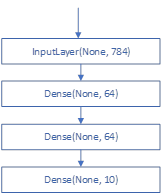

使用函数式 API 构建此模型，请先创建一个输入节点：

In [ ]:
inputs = keras.Input(shape=(784,))

输入数据的形状设置为784 维向量，由于仅指定了每个样本的形状，没用指定批次大小。如果有一个形状为 (32, 32, 3) 的图像输入，则可以使用：

In [ ]:
img_inputs = keras.Input(shape=(32, 32, 3))

返回值inputs将作为Dense层的输入，inputs张量的形状和类型的信息如下：

In [ ]:
inputs.shape
inputs.dtype


接下去定义好 dense 层，可以直接将 inputs 作为 dense 的输入而得到一个输出 x ，然后又将 x 作为下一层的输入，最后的函数返回值就是整个模型的输出。

In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()


“层调用”操作就像从“输入”向创建的该层绘制一个箭头，将输入“传递”到 dense 层，然后得到 x，outputs是最后的输出结果。通过在层计算图中指定模型的输入和输出来创建 Model。
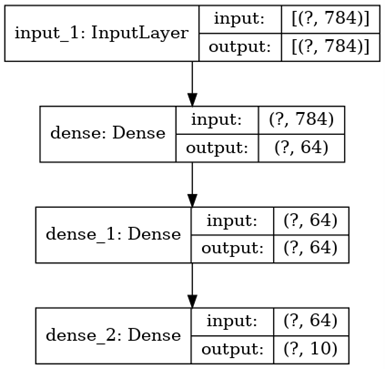

### 	4.2.2训练评估
Keras 模型有两种训练评估的方式，一种方式是使用模型内置 API ，如 model.fit() ， model.evaluate() 和 model.predict() 等分别执行不同的操作；另一种方式是利用即时执行策略 (eager execution) 以及 GradientTape 对象自定义训练和评估流程。对所有 Keras 模型来说这两种方式都是按照相同的原理来工作的，没有本质上的区别。在一般情况下，因为第一种方法更为简单，更易于使用，推荐第一种训练评估方式。在一些特殊的情况下，会考虑使用自定义的方式来完成训练与评估。

Fashion MNIST数据集分类模型完整代码如下所示：

#### 1、预处理数据
直接从 TensorFlow 中导入和加载 Fashion MNIST 数据。加载数据集会返回四个 NumPy 数组：train_images 和 train_labels 数组是训练集，即模型用于学习的数据。test_images 和 test_labels 数组会被用来对模型进行测试。图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间，图像如图4-3所示。标签是整数数组，介于 0 到 9 之间，标签对应于图像所代表的服装类。
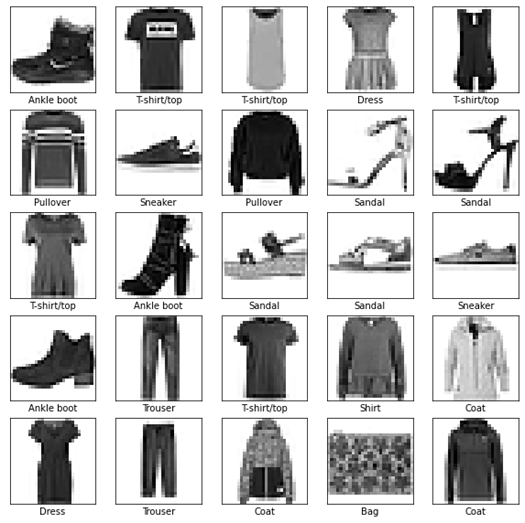

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

在训练网络之前，必须对数据进行预处理。图像的像素值处于 0 到 255 之间，将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此将这些值除以 255，以相同的方式对训练集和测试集进行预处理：

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

print(train_images.shape)

#### 2、构建模型
使用 keras.Sequential() 来创建模型，网络的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。展平像素后，网络包括两个 tf.keras.layers.Dense 层的序列，第一个 Dense 层有 128 个神经元，第二个层会返回一个长度为 10 的数组，用来表示当前图像属于 10 个类中的哪一类。


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#### 3、	编译模型
构建好模型后要对模型进行编译 (compile)，目的是指定模型训练过程中需要用到的优化器 (optimizer)，损失函数 (losses) 以及评估指标 (metrics)。


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


在模型训练之前首先要进行模型编译，因为只有知道了要优化什么目标，如何进行优化以及要关注什么指标，模型才能被正确的训练与调整。 
compile 方法包含三个主要参数：

- 损失 (loss) ，用于测量模型在训练期间的准确率，它指明了要优化的目标，例如MeanSquaredError()、KLDivergence()、CosineSimilarity()等；
- 优化器 (optimizer)，决定模型如何根据其看到的数据和自身的损失函数进行更新，它指明了目标优化的方向，例如SGD()、RMSprop()、Adam()等；
- 指标 (metrics)，用于监控训练和测试步骤，它指明了训练过程中要关注的模型指标，例如AUC()、Precision()、Recall()等。 

Keras API 中已经包含了许多内置的损失函数，优化器以及指标，可以拿来即用，能够满足大多数的训练需要。

损失函数类主要在 tf.keras.losses 模块下，其中包含了多种预定义的损失，比如常用的
- 二分类损失 BinaryCrossentropy 二值交叉熵 ['baɪnəri] 
- 多分类损失 CategoricalCrossentropy 分类交叉熵 [ˌkætəˈɡɔːrɪkl][krɔːs] [krɔːs] 
- 均方根损失 MeanSquaredError [miːn] [skwerd] 

传递给 compile 的参数既可以是一个字符串如 binary_crossentropy 也可以是对应的 losses 实例如 tf.keras.losses.BinaryCrossentropy() ，当需要设置损失函数的一些参数时（比如上例中 from_logits=True)，则需要使用实例参数。

优化器类主要在 tf.keras.optimizers 模块下，一些常用的优化器如 SGD ， Adam 以及 RMSprop 等均包含在内。同样它也可以通过字符串或者实例的方式传给 compile 方法，一般我们需要设置的优化器参数主要为学习率 (learning rate) ，其他的参数可以参考每个优化器的具体实现来动态设置，或者直接使用其默认值即可。

指标类主要在 tf.keras.metrics 模块下，二分类里常用的 AUC 指标以及 lookalike 里常用的召回率 (Recall) 指标等均有包含。同理，它也可以以字符串或者实例的形式传递给 compile 方法，注意 compile 方法接收的是一个 metric 列表，所以可以传递多个指标信息


#### 4、	训练模型
指定模型训练过程中需要用到的优化器 (optimizer)，损失函数 (losses) 以及评估指标 (metrics) ，就可以开始进行模型的训练与交叉验证 (fit)，在训练模型之前需要提前指定好训练数据和验证数据，并设置一些参数如 epochs 等，交叉验证操作会在每轮 (epoch) 训练结束后自动触发。
tf.keras中提供了fit()方法对模型进行训练，先来看看fit()方法的主要参数：
- x和y：训练数据和目标数据
- epochs：训练周期数，每一个周期都是对训练数据集的一次完整迭代
- batch_size：簇的大小，一般在数据集是numpy数组类型时使用
- validation_data：验证数据集，模型训练时，如果你想通过一个额外的验证数据集来监测模型的性能变换，就可以通过这个参数传入验证数据集
- verbose：日志显示方式，verbose=0为不在标准输出流输出日志信息,verbose=1为输出进度条记录，verbose=2为每个epoch输出一行记录
- callbacks：回调方法组成的列表，一般是定义在tf.keras.callbacks中的方法
- validation_split：从训练数据集抽取部分数据作为验证数据集的比例，是一个0到1之间的浮点数。这一参数在输入数据为dataset对象、生成器、keras.utils.Sequence对象是无效。
- shuffle：是否在每一个周期开始前打乱数据


In [ ]:
model.fit(train_images, train_labels, epochs=10)

fit 方法包括训练数据与验证数据参数，它们可以是 numpy 类型数据，或者是 tf.data 模块下dataset类型的数据。fit方法还包括epochs，batch_size以及steps_per_epoch等控制训练流程的参数，并且还可以通过callbacks参数控制模型在训练过程中执行一些其它的操作，如Tensorboard日志记录等。

模型的训练和验证数据可以是 numpy类型数据，最开始的端到端示例即是采用 numpy 数组作为输入。一般在数据量较小且内存能容下的情况下采用 numpy 数据作为训练和评估的数据输入。

对于numpy类型数据来说，如果指定了epochs参数，则
训练数据的总量=原始样本数量 * epochs

默认情况下一轮训练 (epoch) 所有的原始样本都会被训练一遍，下一轮训练还会使用这些样本数据进行训练，每一轮执行的步数(steps)为原始样本数量/batch_size ，如果 batch_size 不指定，默认为 32。

交叉验证在每一轮训练结束后触发，并且也会在所有验证样本上执行一遍，可以指定 validation_batch_size来控制验证数据的batch大小，如果不指定默认同batch_size。

对于numpy类型数据来说，如果设置了steps_per_epoch参数，表示一轮要训练指定的步数，下一轮会在上轮基础上使用下一个 batch 的数据继续进行训练，直到所有的epochs结束或者训练数据的总量被耗尽。要想训练流程不因数据耗尽而结束，则需要保证数据的总量要大于 steps_per_epoch * epochs * batch_size。同理也可以设置 validation_steps，表示交叉验证所需步数，此时要注意验证集的数据总量要大于validation_steps * validation_batch_size。

fit 方法还提供了另外一个参数 validation_split 允许自动保留部分训练数据以进行验证。参数值表示要为验证保留的数据的分数，因此应将其设置为大于0且小于1的数字。例如，validation_split=0.2 表示“使用20％的数据进行验证”，validation_split=0.6 表示“使用60％的数据进行验证”。


#### 5、	评估预测模型

model.evaluate 用于评估您训练的模型。它的输出是准确度或损失，而不是对输入数据的预测。model.predict 实际预测，其输出是目标值，根据输入数据预测。

如果需要测试模型的性能，可以通过model.evaluate ()即可在循环测试数据集上的所有样本，并打印出性能指标，代码如下：


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


在模型经过训练后，可以使用它对一个或者多个图像进行预测。模型具有线性输出，附加一个softmax层，将结果转换成更容易理解的概率

In [ ]:
test_images = test_images.reshape(10000, 28,28)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


预测结果是一个包含10个数字的数组，代表模型对 10 种不同服装中每种服装的“置信度”，可以用np.argmax(predictions[0])查看，第9标签的置信度值最大，因此它是短靴。
每个图像都会被映射到一个标签，依次是T恤，裤子，套头衫，连衣裙，外套，凉鞋，衬衫，运动鞋，包，短靴。定义类别名如下：


In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


可以使用plot_image函数绘制图片，使用plot_value_array函数输出结果图表。

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


再查看第0个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色，数字表示预测标签的百分比。

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


### 项目实战 Cats vs Dogs图像分类

演示如何从头开始图像分类，从磁盘上的 JPEG格式图像文件开始，不使用预训练的权重或预先创建的Keras应用程序模型。在Kaggle Cats vs Dogs二元分类数据集上演示了工作流程。

使用该实用程序来生成数据集，并使用Keras图像预处理层进行图像标准化和数据增强。



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 1.  加载数据：猫与狗数据集

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [ ]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

有一个PetImages文件夹，其中包含两个子文件夹，分别包含猫和狗的图像文件。

过滤掉损坏的图像
在处理大量真实世界的图像数据时，损坏的图像很常见。让我们过滤掉编码不良的图像，这些图像在其标头中没有字符串"JFIF"。

In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

#### 生成一个Dataset

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

In [ ]:
print(train_ds)

#### 可视化数据

以下是训练数据集中的前 9 张图像。如您所见，标签 1 是"狗"，标签 0 是"猫"。

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

#### 使用图像数据增强

当您没有大型图像数据集时，最好通过对训练图像应用随机但逼真的变换（例如随机水平翻转或小随机旋转）来人为地引入样本多样性。这有助于将模型暴露给训练数据的不同方面，同时减缓过拟合。


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#### 标准化数据

我们的图像已经采用标准大小 （180x180），因为它们是由我们的数据集作为连续批处理生成的。但是，它们的 RGB 通道值位于该范围内。这对于神经网络来说并不理想。一般来说，您应该设法使输入值变小。在这里，我们将通过使用模型开头的层来标准化要位于 中的值。

有两种方法可以使用预处理器：data_augmentation

选项 1：使其成为模型的一部分，如下所示：
```
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
...  # Rest of the model
```

使用此选项，您的数据增强将在设备上发生，与模型执行的其余部分同步，这意味着它将受益于GPU加速。

请注意，数据增强在测试时处于非活动状态，因此输入样本将仅在 期间进行扩充，而不会在调用 或 时进行扩充。fit()evaluate()predict()

如果你正在 GPU 上训练，这是更好的选择。

选项2：将其应用于数据集，以便获得生成批量增强图像的数据集，如下所示：

```
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))
```
 
使用此选项，数据扩充将在 CPU 上异步进行，并在进入模型之前进行缓冲。

如果你在 CPU 上训练，这是更好的选择，因为它使数据增强异步和非阻塞。

在我们的例子中，我们将使用第一个选项。

#### 配置数据集以提高性能
让我们确保使用缓冲预取，以便我们可以从磁盘生成数据，而不会使 I/O 阻塞：

In [ ]:
train_ds = train_ds.prefetch(buffer_size=8)
val_ds = val_ds.prefetch(buffer_size=8)

### 2. 构建模型

将构建一个小型版本的Xception网络。我们没有特别尝试优化架构;如果要系统搜索最佳模型配置，请考虑使用 KerasTuner。

请注意：

- 从预处理器开始模型，然后是一层。data_augmentationRescaling
- 在最终分类图层之前包含一个图层。Dropout

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
#keras.utils.plot_model(model, show_shapes=True)

### 3.  训练模型

In [ ]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, verbose = 2, validation_data=val_ds,
)

### 4. 测试模型

In [ ]:
image_size = (180, 180)
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/2183.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

new_model = tf.keras.models.load_model('save_at_25.h5')

predictions = new_model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

## 	4.3 任务2：模型保存与加载
模型训练完成后，需要将模型保存到文件系统上，提供给后续的模型测试与部署。在训练时间隔性地保存模型状态也是非常好的习惯，对于训练大规模的网络尤其重要，大规模的网络常常需要训练数天乃至数周，一旦训练过程被中断或者发生宕机等意外，之前训练的进度将全部丢失。如果能够在训练过程中定时的保存模型，即使发生意外推出训练过程，也可以从最近一次保存模型状态的文件中恢复。因此模型的保存与加载非常重要。

### 	4.3.1 SavedModel方式保存模型 
SavedModel 保存的模型包含了一个 TensorFlow 程序的完整信息：不仅包含参数的权值，还包含计算的流程（架构或配置）。当模型导出为 SavedModel 文件时，无须模型的源代码即可再次运行模型，这使得 SavedModel 尤其适用于模型的分享和部署。TensorFlow Serving（服务器端部署模型）、TensorFlow Lite（移动端部署模型）以及 TensorFlow.js 都会用到这一格式。训练好的TensorFlow模型包含一下几个部分内容：
- 架构或配置，是指定模型包含的层及其连接方式。
- 模型的状态，即训练得到的所以变量的权重值。
- 编译模型时定义的优化器。
- 编译模型或通过调用 add_loss() 定义的损失函数以及 add_metric() 函数定义的指标。

TensorFlow 提供了统一模型导出格式 SavedModel，训练好的模型可以以这一格式保存到单个文档，在多种不同平台上部署，这是TensorFlow 2 中主要使用的导出格式。也可以仅保存架构/配置，通常保存为 JSON 文件，或者在训练模型时仅保存权重值，作为训练过程的备份文件。另外Keras 的 Sequential 和 Functional 模式也有自有的模型导出格式。
Keras提供的保存和加载模型API函数如下：

- model.save() 或 tf.keras.models.save_model()
- tf.keras.models.load_model()

可以使用TensorFlow SavedModel 格式和Keras H5格式将整个模型保存到磁盘，推荐使用 SavedModel 格式，这是使用 model.save() 时的默认格式。


SavedModel 基于计算图，所以对于使用继承 tf.keras.Model 类建立的 Keras 模型，其需要导出到 SavedModel 格式的方法（比如 call ）都需要使用 @tf.function 修饰。假设名为model的Keras模型，使用下面的代码即可将模型导出为 SavedModel：

model.save( "path_to_saved_model")

'path_to_saved_model'不再是模型名称，仅仅是一个文件夹，模型会保存在这个文件夹之下。

在需要载入 SavedModel 文件时，使用如下代码：

model = tf.keras.models.load_model("path_to_saved_model")

以下是一个简单的示例，将4.2.1小节的Fashion模型进行导出和导入，导出模型到 my_model 文件夹，代码如下：


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_split=0.2
)

model.save("my_model")


调用 model.save('my_model') 会创建一个名为 my_model 的文件夹，其包含以下内容：

### 	4.3.2 H5格式保存模型
Keras 还支持保存单个H5文件，其中包含模型的架构、权重值和 compile() 信息。它是 SavedModel 的轻量化替代选择。将整个模型为一个 H5文件，由于是保存的整个模型，这个文件包括模型的结构、模型的权值、模型的配置，即通过compile编译模型的一些信息，如优化器，损失函数等、优化器。

使用下面的代码即可将模型导出为H5文件。保存模型代码如下：

model.save('path_to_my_model.h5')

加载H5格式模型，同时加载了模型的结构、权重等信息，代码如下：

new_model = tf.keras.models.load_model('path_to_my_model.h5')

以上节的Fashion模型进行导出和导入为例，导出模型到my_h5_model.h5文件中，代码如下：

model.save("my_h5_model.h5")

由于没有指定路径，即在当前工作目录下生成my_h5_model.h5文件



加载模型使用load_model，代码如下

new_model = tf.keras.models.load_model("my_h5_model.h5")

与 SavedModel 格式相比，H5 文件不包括以下两方面内容：

通过 model.add_loss() 和 model.add_metric() 添加的外部损失和指标不会被保存（这与 SavedModel 不同）。如果您的模型有此类损失和指标且您想要恢复训练，则您需要在加载模型后自行重新添加这些损失。请注意，这不适用于通过 self.add_loss() 和 self.add_metric() 在层内创建的损失/指标。只要该层被加载，这些损失和指标就会被保留，因为它们是该层 call 方法的一部分。

已保存的文件中不包含自定义对象（如自定义层）的计算图。在加载时，Keras 需要访问这些对象的 Python 类/函数以重建模型。请参阅自定义对象。


### 4.3.3 检查点(Checkpoint)格式保存模型
Tensorflow的检查点(Checkpoint)机制将可追踪变量以二进制的方式储存成一个.ckpt文件，储存了变量的名称及对应张量的值。以 tf.keras.layers.Dense 层为例。该层包含两个权重：dense.kernel 和 dense.bias。将层保存为 tf 格式后，生成的检查点会包含 "kernel" 和 "bias" 键及其对应的权重值。

Checkpoint 只保存模型的参数，不保存模型的计算过程，因此一般用于在具有模型源代码的时候恢复之前训练好的模型参数。TensorFlow 提供了 tf.train.Checkpoint 这一强大的变量保存与恢复类，可以使用其 save() 和 restore() 方法将 TensorFlow 中所有包含 Checkpointable State 的对象进行保存和恢复。具体而言，tf.keras.optimizer 、 tf.Variable 、 tf.keras.Layer 或者 tf.keras.Model 实例都可以被保存。首先声明一个 Checkpoint：

checkpoint = tf.train.Checkpoint(model=model)

这里 tf.train.Checkpoint() 接受的初始化参数值为需要保存的对象。例如，如果保存一个继承 tf.keras.Model 的模型实例 model 和一个继承 
tf.train.Optimizer 的优化器 optimizer ，代码如下：

checkpoint = tf.train.Checkpoint(myModel=model, myOptimizer=optimizer)

myModel 是为待保存的模型 model 所取的任意键名。在恢复变量的时候还将使用这一键名。

接下来，当模型训练完成需要保存的时候，使用：

checkpoint.save(save_path_with_prefix)


例如在源代码目录创建名为 save 的文件夹，并调用一次 checkpoint.save('./save/model.ckpt') ，就可以在可以在 save 目录下发现名为 checkpoint 、 model.ckpt-1.index 、 model.ckpt-1.data-00000-of-00001 的三个文件，这些文件就记录了变量信息。checkpoint.save() 方法可以运行多次，每运行一次都会得到一个. index 文件和. data 文件，序号依次累加。

当在其他地方需要为模型重新载入之前保存的参数时，需要再次实例化一个 checkpoint，同时保持键名的一致。再调用 checkpoint 的 restore 方法。代码如下：


model_to_be_restored = MyModel()   

checkpoint = tf.train.Checkpoint(myModel=model_to_be_restored)

checkpoint.restore(save_path_with_prefix_and_index)

即可恢复模型变量。 save_path_with_prefix_and_index 是之前保存的文件的目录 + 前缀 + 编号。例如，调用 checkpoint.restore('./save/model.ckpt-1') 就可以载入前缀为 model.ckpt ，序号为 1 的文件来恢复模型。

当保存了多个文件时，希望载入最后一个，可使用 tf.train.latest_checkpoint(save_path)。例如 save 目录下有 model.ckpt-1.index 到 model.ckpt-10.index 的 10 个保存文件， tf.train.latest_checkpoint('./save') 即返回 ./save/model.ckpt-10 。


In [ ]:
model = MyModel()
# 实例化Checkpoint，指定保存对象为model（如果需要保存Optimizer的参数也可加入）
checkpoint = tf.train.Checkpoint(myModel=model)
# ...（模型训练代码）
# 模型训练完毕后将参数保存到文件（也可以在模型训练过程中每隔一段时间就保存一次）
checkpoint.save('./save/model.ckpt')

# test.py 模型使用阶段
model = MyModel()
checkpoint = tf.train.Checkpoint(myModel=model)     # 实例化Checkpoint，指定恢复对象为model
checkpoint.restore(tf.train.latest_checkpoint('./save'))    # 从文件恢复模型参数
# 模型使用代码


## 	4.4 任务3：tf.data优化训练数据

GPU、TPU的使用能够从根本上减少单个训练step所需的时间。但优异的性能不仅依赖于高速的计算硬件，也要求有一个高效的输入管道（Input Pipeline Performance Guide），这个管道在当前step完成前，进行下一个 step 需要的数据的准备。TensorFlow 提供tf.data API便捷地加载数据集，构建高性能的 TensorFlow 数据输入管道。tf.dataAPI能够处理大量的数据，从不同的数据格式读取，并执行复杂的转换。

### 4.4.1 训练数据输入模型的方法

使用TensorFlow搭建深度学习模型进行训练时，需要把数据集处理后送给模型，TensorFlow在这些年的发展过程中，有以下三种方法：

1.	定义placeholder（占位符），通过字典填充函数feed_dict读取数据

这在TensorFlow 1.0中广泛使用，这个方法比较灵活，在训练数据比较小时，可以一次把所有数据读入内存，然后分批次进行填充数据。当数据量较大时，也可以建立一个generator（生成器），然后分多个批次依次从硬盘中读入并填充数据。

2.	TensorFlow的queue_runner方法

这种方法是使用Python实现的,其性能受限于C++ multi-threading ，而tf.data API使用了C++ multi-threading。入队操作是从硬盘中读取输入，放到内存当中，速度较慢。使用QueueRunner可以 创建一系列新的线程 进行入队操作，让主线程继续使用数据。
如果在训练神经网络的场景中，就是训练网络和读取数据是异步的，主线程在训练网络，另一个线程在将数据从硬盘读入内存。

3.	tf.data API

作为新的API，比以上两种方法的速度都快，并且使用难度要远远低于使用Queues。tf.data中包含了两个用于TensorFLow程序的接口:Dataset和Iterator。

一个抽象的概念是tf.data.Dataset，一个Dataset是一个数据集，它是由一系列的元素组成的，每个元素的类型都是相同的。Dataset  API 在 TensorFlow 1.4版本中已经从tf.contrib.data迁移到了tf.data之中，增加了对于Python的生成器的支持，官方建议使用Dataset API 为 TensorFlow模型创建输入管道，原因如下：

- 与旧 API（feed_dict 或队列式管道）相比，Dataset API 可以提供更多功能。
- Dataset API 的性能更高。
- Dataset API 更简洁，更易于使用。

将来 TensorFlow 团队将会将开发中心放在Dataset API而不是旧的API上。

另外一个抽象的概念是tf.data.Iterator,它代表的是迭代器。表示的是如何从数据集里面取出元素，最简答的迭代器是单次迭代器，Dataset.make_one_shot_iterator()可以创建单次迭代器。创建迭代器以后，可以使用Iterator.get_next()来获取下一个元素。


### 	4.4.2 tf.data API
一个典型的 TensorFlow 训练输入管道可以构建为 ETL 过程：

- 提取数据（Extract）：将训练数据从存取器（硬盘、云端等）提取。
- 转换数据（Transform）：将数据转换为模型可读取的数据，同时进行数据清洗等预处理，即使用 CPU 内核对数据进行解析和执行预处理操作，例如图像解压缩，数据扩充转换（例如随机裁剪，翻转和颜色失真），随机洗牌和批处理。
- 装载数据（Load）：将变换后的数据加载到执行机器学习模型的加速器设备（例如，GPU 或 TPU）上。

这种模式有效地利用了 CPU，与此同时为了模型训练这种繁重的工作，还保留了加速器。此外，将输入管道视为 ETL 过程提供了便于性能优化应用的结构。

随着新的计算设备（诸如 GPU 和 TPU）不断问世，训练神经网络的速度变得越来越快，这种情况下 CPU 处理很容易成为瓶颈，如图4-6所示。tf.dataAPI 为用户提供构建块，以设计有效利用 CPU 的输入管道，优化 ETL 过程的每个步骤。

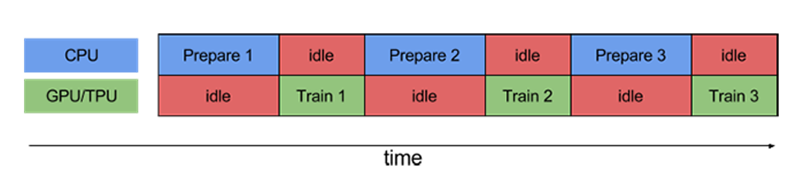


要执行训练时，首先需要提取并转换训练数据，然后将其提供给在GPU上运行的模型。然而在一个简单的同步执行中，当 CPU 正在准备数据时，GPU则处于空闲状态。相反当GPU正在训练模型时，CPU 则处于空闲状态。因此训练步骤时间是 CPU 预处理时间和加速器训练时间的总和。

流水线化(Pipelining)则将一个训练步骤的预处理和模型执行重叠。当加速器正在执行训练步骤N时，CPU正在准备步骤N+1的数据。这样做的目的是可以将步骤时间缩短到极致，包含训练以及提取和转换数据所需时间

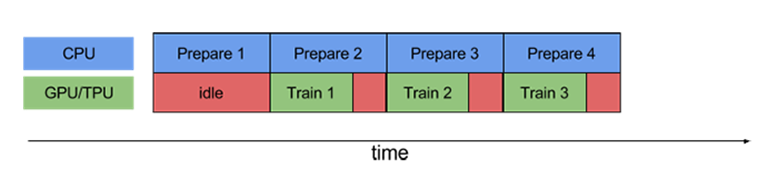

如果没有使用 pipelining，则 CPU 和 GPU / TPU 在大部分时间处于闲置状态。使用 pipelining技术后，空闲时间显著减少。

tf.data API 通过 tf.data.Dataset.prefetch 转换提供了一个软件 pipelining 操作机制，该转换可用于将数据生成的时间与所消耗时间分离。特别是，转换使用后台线程和内部缓冲区，以便在请求输入数据集之前从输入数据集中预提取元素。

准备批处理时，可能需要预处理输入元素。为此，tf.dataAPI 提供了 tf.data.Dataset.map 转换，它将用户定义的函数应用于输入数据集的每个元素。


### 	4.4.3 tf.data.Dataset
tf.data.Dataset模块提供了常用经典数据集的自动下载、管理、加载与转换功能，方便实现多线程(Multi-thread)，预处理(Preprocess)，随机打散(Shuffle)和批训练(Train on batch)等常用数据集功能。

1.	读取输入数据

该函数作用是把给定的元组、列表和张量等数据进行特征切片。切片的范围是从最外层维度开始的。如果有多个特征进行组合，那么一次切片是把每个组合的最外维度的数据切开，分成一组一组的。

假设有两组数据，分别是特征和标签，每两个特征对应一个标签。之后把特征和标签组合成一个tuple，让每个标签都恰好对应2个特征，而且像直接切片，比如：[f11, f12] [t1]。f11表示第一个数据的第一个特征，f12表示第一个数据的第二个特征，t1表示第一个数据标签。


In [ ]:
features, labels = (np.random.sample((6, 2)),  # 模拟6组数据，每组数据2个特征
               np.random.sample((6, 1)))  # 模拟6组数据，每组数据对应一个标签

print((features, labels))  #  输出下组合的数据
data = tf.data.Dataset.from_tensor_slices((features, labels))
print(data)  # 输出张量的信息


从结果可以看出，该函数将数据分为了shape为（（2，），（1，））的数据形式，即每两个特征对应一个标签。

许多数据集是一个或多个文本文件，可以利用tf.data.TextLineDataset处理文件数据。 tf.data.TextLineDataset提供了一种简单的方法来提取一个或多个文本文件内容。给定一个或多个文件名，aTextLineDataset将在这些文件的每一行生成一个字符串值元素。

首先下载文本文件，代码如下：


In [ ]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]


分别下载了cowper.txt, derby.txt, butler.txt三个文件，使用TextLineDataset处理文件数据。

In [ ]:
dataset = tf.data.TextLineDataset(file_paths)

读取第一个文件（cowper.txt）的前五行

In [ ]:
for line in dataset.take(5):
  print(line.numpy())


使用 Dataset.interleave 交替读取文件中的行内容，这样可以更容易地将文件混合在一起。以下是每个文本的第一行、第二行和第三行

In [ ]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

for i, line in enumerate(lines_ds.take(9)):
  if i % 3 == 0:
    print()
  print(line.numpy())


2.	tf.data.Dataset常用方法 

tf.data.Dataset是TensorFlow用于数据输入的接口，不仅可以简洁高效的实现数据的读入、还提供了打乱（shuffle）、增强（augment）等功能。下面以一个简单的实例讲解该功能的基本使用方法。

创建一个简单的数据集，该数据包含10个样本，每个样本由1个浮点数组成。


In [ ]:
data = np.array([0.1, 0.4, 0.6, 0.2, 0.8, 0.8, 0.4, 0.9, 0.3, 0.2])

其中大于0.5的样本为正样本，即标签记为1，否则为0。

In [ ]:
label = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

利用tf.data.Dataset.from_tensor_slices建立数据集。

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((data, label))

训练网络时数据不止迭代一轮，可以利用repeat()方法使数据集能多次迭代。

In [ ]:
dataset = dataset.repeat()
it = dataset.__iter__()
for i in range(20):
    x, y = it.next()
    print(x, y)


shuffle()方法是随机打乱样本次序，参数buffer_size建议设为样本数量，过大会浪费内存空间，过小会导致打乱不充分。

In [ ]:
dataset = dataset.shuffle(buffer_size=10)
it = dataset.__iter__()
for i in range(10):
    x, y = it.next()
    print(x, y)


batch()方法是将多个元素组合成一批数据，使迭代器一次获取多个样本。

dataset_batch = dataset.batch(batch_size=5)
it = dataset_batch.__iter__()
for i in range(2):
    x, y = it.next()
    print(x, y)


Dataset对象通过提供map(func)方法可以非常方便地调用用户自定义的预处理逻辑。Map方法的输入参数func是一个函数，可以在func函数中实现需要的对数据的变换，如图片加载、数据增强、标签one hot化等。

如果还需要map方法添加额外的参数，就要用lambda表达式，也就是dataset = dataset.map(lambda x: func(x))。

下面以one hot为例具体说明，首先实现one hot函数。


In [ ]:
def one_hot(x, y):
    if y == 0:
        return x, np.array([1, 0])
    else:
        return x, np.array([0, 1])


数据集对应执行map方法，将标签one hot。

In [ ]:
dataset_one_hot = dataset.map(one_hot)
it = dataset_one_hot.__iter__()
for i in range(10):
    x, y = it.next()
    print(x, y)


## 4.5 任务4：花卉识别
根据拍摄照片，识别图片中植物的名称，可配合其它识图能力对识别的结果进一步细化，广泛应用于拍照识图类APP中。百度提供的API可识别超过2万种常见植物和近8千种花卉。支持获取识别结果的百科信息，返回百科词条URL、图片和描述等。本小节将以Google 在TensorFlow帮助文档中提供的5类花朵的训练图片为数据集，使用tf.keras建立一个简单的花卉识别模型。


### 4.5.1 下载图片

花卉图片下载地址为：http://download.tensorflow.org/example_images/flower_photos.tgz。包含了5类花朵的训练图片，包括daisy、dandelion、sunflowers、tulips、roses，中文名：菊花、 蒲公英、向日葵、郁金香、玫瑰。可以新建个flower_demo文件夹，用于存放数据和训练的模型。


In [ ]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='http://download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)


打开训练样本文件夹 flower_photos ，里面有 5 种类别的花：daisy(雏菊), dandelion(蒲公英), roses(玫瑰), sunflowers(向日葵) , tulips(郁金香)，总共3672张，每个类别的大概有 600-900 张训练样本图片

快速浏览一张图片

In [ ]:
import IPython.display as display
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

for n in range(1):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))


每一个类别的图片都放在同一个文件夹下，根据所在文件夹确定每张图片的标签。列出可用的标签，即文件夹名：

In [ ]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names


为每个标签分配索引，创建一个列表，包含每个文件的标签索引：

In [ ]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])


### 4.5.2 构建花卉数据集

all_image_paths存放了所有图片的路径，用from_tensor_slices方法构建tf.data.Dataset对象。


In [ ]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
path_ds

path_ds是一组字符串标量。shapes（维数） 和 types（类型） 描述数据集里每个数据项的内容。

通过map方法创建一个新的数据集，在path_ds数据集上映射load_and_preprocess_image来动态加载和格式化图片，根据模型调整图片大小为[192, 192]。


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range
  return image
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)


使用同样的 from_tensor_slices 方法创建一个标签数据集。

In [ ]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
for label in label_ds.take(5):
  print(label_names[label.numpy()])


由于图片数据集与标签数据集顺序相同，可以将其打包在一起，得到一个(图片, 标签)对数据集。

In [ ]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print(image_label_ds)


要使用此数据集训练模型，需要对其做如下处理：

- 被充分打乱。
- 被分割为 batch。
- 永远重复。
- 尽快提供 batch。


In [ ]:
image_count = len(all_image_paths)
BATCH_SIZE = 32

# 设置一个和数据集大小一致的 shuffle buffer size（随机缓冲区大小）以保证数据
# 被充分打乱。
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# 当模型在训练的时候，`prefetch` 使数据集在后台取得 batch。
ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
ds


在 .repeat 之后 .shuffle，会在 epoch 之间打乱数据（当有些数据出现两次的时候，其他数据还没有出现过）。在 .batch 之后 .shuffle，会打乱 batch 的顺序，但是不会在 batch 之间打乱数据。
在完全打乱中使用和数据集大小一样的 buffer_size（缓冲区大小）。较大的缓冲区大小提供更好的随机化，但使用更多的内存，直到超过数据集大小。

在从随机缓冲区中拉取任何元素前，要先填满它。所以当Dataset（数据集）启动的时候一个大的 buffer_size（缓冲区大小）可能会引起延迟。

在随机缓冲区完全为空之前，被打乱的数据集不会报告数据集的结尾。Dataset（数据集）由 .repeat 重新启动，导致需要再次等待随机缓冲区被填满。


### 4.5.2 构建与训练模型

Keras 的应用模块（keras.applications）提供了带有预训练权值的深度学习模型，这些模型可以用来进行预测、特征提取和微调。TensorFlow官网提供了在 ImageNet 上预训练过的用于图像分类的模型，例如VGG19、Xception、ResNet50、InceptionV3、MobileNet、DenseNet。
首先下载MobileNet v2 副本。


In [ ]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)

MobileNet v2模型期望它的输出被标准化至 [-1,1] 范围内，因此将输出传递给 MobilNet v2模型之前，需要将其范围从 [0,1] 转化为 [-1,1]。MobileNet v2为每张图片的特征返回一个 6x6 的空间网格。

In [ ]:
def change_range(image,label):
  return 2*image-1, label

keras_ds = ds.map(change_range)
# 数据集可能需要几秒来启动，因为要填满其随机缓冲区。
image_batch, label_batch = next(iter(keras_ds))
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)


构建花卉预测模型，该模型以MobileNet v2模型为骨干网络，使用 tf.keras.layers.GlobalAveragePooling2D 来平均MobileNet v2模型输出空间向量。结果输入一个Flatten层以及一个全连接层，上面有 128 个单元，由relu激活函数激活，最后由一个全连接层输出结果。

In [ ]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(label_names))
])


选择optimizers.Adam优化器和losses.SparseCategoricalCrossentropy损失函数。传递metrics参数，查看每个训练时期的训练和验证准确性。

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
#with tf.device('/device:CPU:0'):
  model.fit(ds, epochs=10,steps_per_epoch=115)

#### 4.5.3 保存与加载模型

使用model.save(' mobile_net_flower ') 保存模型，save方法回创建一个名为mobile_net_flower的文件夹，模型保存在这文件夹中。


In [ ]:
model.save("mobile_net_flower")
#ls mobile_net_flower


使用load_model方法加载模型，新模型的名称为flower_model。

In [ ]:
flower_model = keras.models.load_model("mobile_net_flower")

下载一个向日葵的图片，保存在当前用户模型下，使用flower_model模型进行预测。

In [ ]:
import numpy as np
sunflower_path = 'C:\\Users\\pingz\\Documents\\5794839_200acd910c_n.jpg'

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(192, 192)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = flower_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(label_names[np.argmax(score)], 100 * np.max(score))
)


### 花卉识别 （方法2）
#### 1. 下载图片

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\pingz\.keras\datasets\flower_photos


包含 3，670 张花卉照片的数据集：

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


查看图片，例如玫瑰：

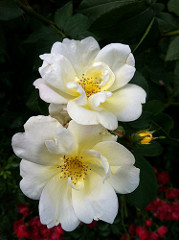

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

#### 2. 使用 Keras 加载数据
可以通过访问加载和预处理图像教程从头开始编写自己的数据加载代码，或者使用tf.keras.utils.image_dataset_from_directory()函数将这些图像从磁盘加载到tf.data.Dataset。
```
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)
```
- directory: 数据所在目录。如果标签是“inferred”（默认），则它应该包含子目录，每个目录包含一个类的图像。否则，将忽略目录结构。 

- labels: “inferred”（标签从目录结构生成），或者是整数标签的列表/元组，其大小与目录中找到的图像文件的数量相同。标签应根据图像文件路径的字母顺序排序（通过Python中的os.walk(directory)获得）。

- label_mode: 'int'：表示标签被编码成整数（例如：sparse_categorical_crossentropy loss）。‘categorical’指标签被编码为分类向量（例如：categorical_crossentropy loss）。‘binary’意味着标签（只能有2个）被编码为值为0或1的float32标量（例如：binary_crossentropy）。None（无标签）。

- class_names: 仅当“labels”为“inferred”时有效。这是类名称的明确列表（必须与子目录的名称匹配）。用于控制类的顺序（否则使用字母数字顺序）。

- color_mode: "grayscale"、"rgb"、"rgba"之一。默认值："rgb"。图像将被转换为1、3或者4通道。

- batch_size: 数据批次的大小。默认值：32

- image_size: 从磁盘读取数据后将其重新调整大小。默认：（256，256）。由于管道处理的图像批次必须具有相同的大小，因此该参数必须提供。

- shuffle: 是否打乱数据。默认值：True。如果设置为False,则按字母数字顺序对数据进行排序。

- seed: 用于shuffle和转换的可选随机种子。

- validation_split: 0和1之间的可选浮点数，可保留一部分数据用于验证。

- subset: "training"或"validation"之一。仅在设置validation_split时使用。

- interpolation: 字符串,当调整图像大小时使用的插值方法。默认为：bilinear。支持bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.。

- follow_links: 是否访问符号链接指向的子目录。默认：False。

In [5]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


使用 80% 的图像进行训练，使用 20% 的图像进行验证。可以在数据集的属性中找到类名，对应于按字母顺序排列的目录名称。

In [6]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


显示训练数据集中的前九张图像：

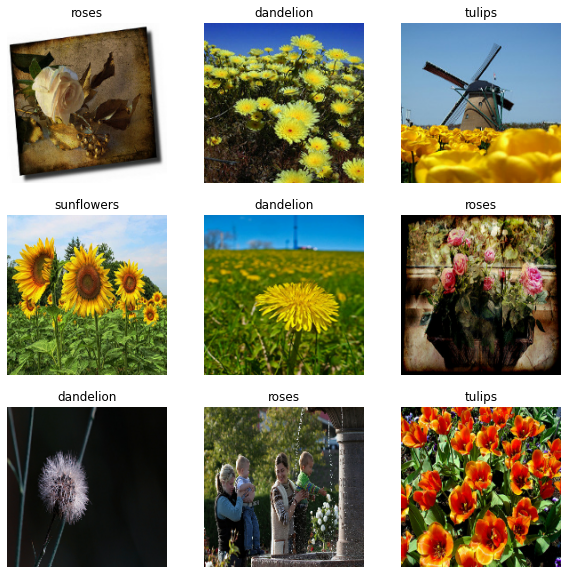

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

可以直接使用该数据集传递到 Model.fit 来训练模型。如果需要也可以手动循环访问数据集并检索成批的图像：

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


一批数据为：32张形状图像（最后一个维度是指颜色通道RGB）。labels_batch是对应于32个图像的标签。

#### 3. 配置数据集以提高性能

确保使用缓冲预取，以便您可以从磁盘生成数据，而不会使 I/O 阻塞。加载数据时应使用的两种重要方法：

- Dataset.cache 在第一个 epoch 期间将图像从磁盘加载到磁盘后，会将其保留在内存中。这将确保数据集在训练模型时不会成为瓶颈。如果数据集太大而无法放入内存，则还可以使用此方法创建高性能磁盘缓存。

- Dataset.prefetch 在训练时会重叠数据预处理和模型执行。

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### 4.标准化数据和数据增强
RGB 通道值在该范围内。这对于神经网络来说并不理想。一般来说，您应该设法使输入值变小。[0, 255]

可以使用 tf.keras.layers.Rescaling 将值标准化为在范围内：[0, 1]

```
normalization_layer = layers.Rescaling(1./255)
```
或者通过调用 Dataset.map 将其应用于数据集：

```
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
```

数据增强采用从现有示例生成其他训练数据的方法，方法是使用随机转换来增强它们，从而生成看起来可信的图像。这有助于给模型提供数据的更多方面，并更好地进行泛化。

可以使用以下Keras 预处理层实现数据增强：tf.keras.layers.RandomFlip、tf.keras.layers.RandomRotation 和 tf.keras.layers.RandomZoom。它们可以像其他图层一样包含在模型中，并在 GPU 上运行。

In [10]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

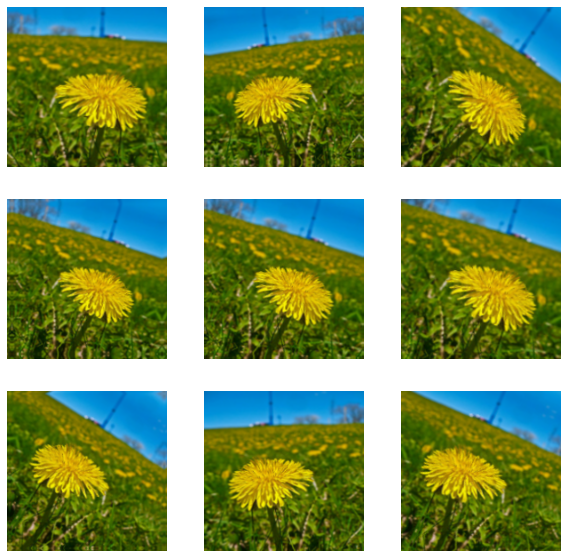

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### 5. 创建模型

In [12]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### 6. 编译模型

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

#### 7.训练模型

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 6s 40ms/step - loss: 1.2413 - accuracy: 0.4704 - val_loss: 1.0656 - val_accuracy: 0.5831
Epoch 2/10
92/92 [==============================] - 3s 35ms/step - loss: 1.0264 - accuracy: 0.5943 - val_loss: 0.9843 - val_accuracy: 0.6213
Epoch 3/10
92/92 [==============================] - 3s 35ms/step - loss: 0.9207 - accuracy: 0.6376 - val_loss: 1.1217 - val_accuracy: 0.5858
Epoch 4/10
92/92 [==============================] - 3s 35ms/step - loss: 0.8645 - accuracy: 0.6666 - val_loss: 0.8451 - val_accuracy: 0.6689
Epoch 5/10
92/92 [==============================] - 3s 35ms/step - loss: 0.7905 - accuracy: 0.6958 - val_loss: 0.8685 - val_accuracy: 0.6540
Epoch 6/10
92/92 [==============================] - 3s 35ms/step - loss: 0.7633 - accuracy: 0.7057 - val_loss: 0.9638 - val_accuracy: 0.6322
Epoch 7/10
92/92 [==============================] - 3s 35ms/step - loss: 0.7381 - accuracy: 0.7170 - val_loss: 0.7530 - val_accuracy: 0.6948
Epoch 8/10
92

#### 8.可视化训练结果

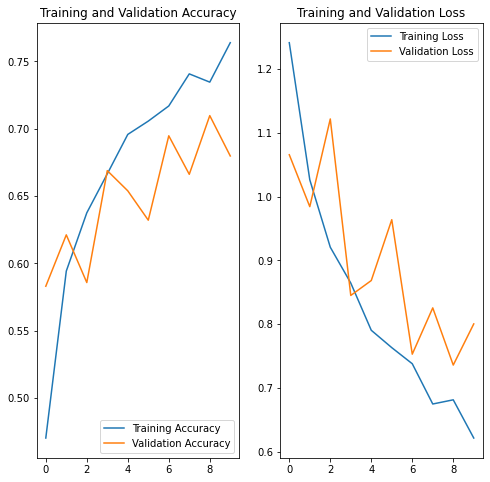

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 9. 预测新数据

In [16]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 1us/step
This image most likely belongs to sunflowers with a 99.88 percent confidence.
